# Explore the Data

First I downloaded the training data

In [144]:
import pandas as pd
url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/credit-risk/train.csv"
df_train = pd.read_csv(url)

In [45]:
df_train

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,25,43200,RENT,NaN,VENTURE,B,1200,9.91,0,0.03,N,4
1,27,98000,RENT,3.0,EDUCATION,C,11750,13.47,0,0.12,Y,6
2,22,36996,RENT,5.0,EDUCATION,A,10000,7.51,0,0.27,N,4
3,24,26000,RENT,2.0,MEDICAL,C,1325,12.87,1,0.05,N,4
4,29,53004,MORTGAGE,2.0,HOMEIMPROVEMENT,A,15000,9.63,0,0.28,N,10
...,...,...,...,...,...,...,...,...,...,...,...,...
26059,36,150000,MORTGAGE,8.0,EDUCATION,A,3000,7.29,0,0.02,N,17
26060,23,48000,RENT,1.0,VENTURE,A,4325,5.42,0,0.09,N,4
26061,22,60000,RENT,0.0,MEDICAL,B,15000,11.71,0,0.25,N,4
26062,30,144000,MORTGAGE,12.0,PERSONAL,C,35000,12.68,0,0.24,N,8


In [17]:
table = df_train.groupby(['loan_status']).aggregate({'person_age': 'mean', 'person_emp_length': 'mean'})
print(table)

             person_age  person_emp_length
loan_status                               
0             27.816506           4.954096
1             27.439076           4.159375


We see here mean age and employment rate for each loan status. This table shows us that there is not significant variation on loan status based on age or employment length. This is an important finding as it indicates that these two features are probably not the most useful indicators of loan status.

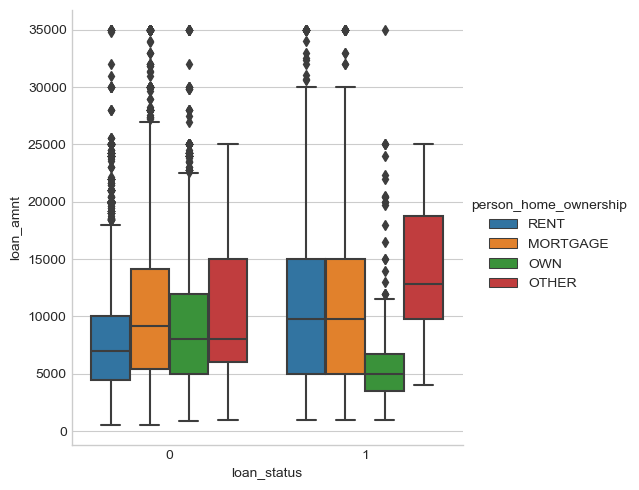

In [58]:
import seaborn as sns

sns.catplot(data=df_train, x="loan_status", y="loan_amnt", hue="person_home_ownership", kind="box")

Here we see loan status graphed against loan amount, with a color/bar separation based on home ownership type: rent, mortgage, own, or other. This graph shows us a couple of things. Firstly, that defaulted loans are on average of a higher loan amount. This is clearest when you compare each home ownership category loan status rate/ loan amount. It also shows a general trend of the other category and mortgage having teh highest loan amounts while rent and own and slightly lower.

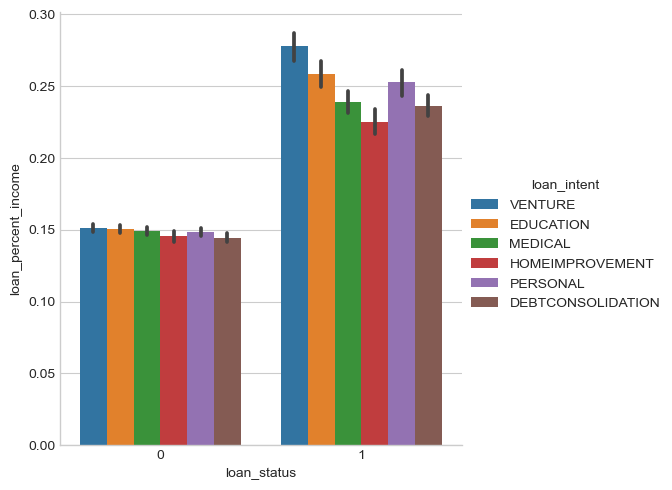

In [19]:
sns.catplot(data=df_train, x="loan_status", y="loan_percent_income", hue="loan_intent", kind="bar")

This figure shows loan status graphed against loan percent income. The color of each bar indicates the loan intent: venture, education, medical, home improvement, personal, or debt consolidation. This graph shows a stark disparity in loan percent income for loan status, with defaulted loans having overall significantly higher loan percentage incomes. The difference in loan percent income on loan intent categories is almost negligible for repaid loans and becomes more significant in defaulted loans (in the order venture, medical, personal, medical and debt consolidation, then home improvement).

# Train Logistic Regression 

First, I prepared the data by dropping loan grate and status on the training set and dropping na columns and fitting qualitative columns.

In [145]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_train["loan_status"])

def prepare_data(df_train):
  loan_intent_original = df_train["loan_intent"].copy()

  df_train = df_train.drop(["loan_grade"], axis = 1)
  df_train = df_train.dropna()
  df_train["cb_person_default_on_file"] = le.fit_transform(df_train["cb_person_default_on_file"])
  df_train["loan_intent"] = le.fit_transform(df_train["loan_intent"])  
  df_train = pd.get_dummies(df_train)
  return df_train, loan_intent_original

df_train, loan_intent_original = prepare_data(df_train)
y_train = df_train["loan_status"].to_numpy()
X_train = df_train.drop(["loan_status"], axis = 1)


In [84]:
df_train

,person_age,person_income,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
1,27,98000,3.0,1,11750,13.47,0,0.12,1,6,False,False,False,True
2,22,36996,5.0,1,10000,7.51,0,0.27,0,4,False,False,False,True
3,24,26000,2.0,3,1325,12.87,1,0.05,0,4,False,False,False,True
4,29,53004,2.0,2,15000,9.63,0,0.28,0,10,True,False,False,False
6,21,21700,2.0,2,5500,14.91,1,0.25,0,2,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26059,36,150000,8.0,1,3000,7.29,0,0.02,0,17,True,False,False,False
26060,23,48000,1.0,5,4325,5.42,0,0.09,0,4,False,False,False,True
26061,22,60000,0.0,3,15000,11.71,0,0.25,0,4,False,False,False,True
26062,30,144000,12.0,4,35000,12.68,0,0.24,0,8,True,False,False,False


I iterated through sets of three features in the training set to find the best three features to train my logistic regression (using cross validation). I considered all home ownership columns as one feature as I had to split them during data prep. 

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
import pandas as pd 
from itertools import combinations

home_ownership_cols = [col for col in X_train.columns if 'person_home_ownership' in col]

bestLRScore = 0.0
bestLRCols=[]

for triple in combinations(X_train.columns, 3):

    cols = list(triple)
    
    if any( col in home_ownership_cols for col in cols):
        cols += home_ownership_cols
        
    LR = LogisticRegression()
    
    LRScore = cross_val_score(LR, X_train[cols], y_train, cv=5).mean()
    
    if LRScore >= bestLRScore :
      bestLRScore = LRScore
      bestLRCols = cols

print(bestLRScore)
print(bestLRCols)        
    
LR = LogisticRegression(random_state=0)
LR.fit(X_train[bestLRCols], y_train)
weights = LR.coef_

print(weights)

/Users/lindseyschweitzer/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/lindseyschweitzer/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

0.8489539327556717
['person_age', 'loan_percent_income', 'person_home_ownership_MORTGAGE', 'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT']
[[-4.40967254e-03  8.25436217e+00 -2.68412756e-01 -2.68412756e-01
   8.87470311e-02 -1.62256717e+00  4.83031411e-01]]


/Users/lindseyschweitzer/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Find the optimal Threshold

Linear score function that takes the cross product of my training data of the chosen features and weights from trained logistic regression.

In [26]:
import numpy as np


def linear_score(X, w):
    return X@w.T


s = linear_score(X_train[bestLRCols], weights)

ROC curve which shows the TPR and FPR for many different values of the threshold t. The goal is to ultimately find a point where TPR is maximized and FPR is minimized.

100%|██████████| 101/101 [00:00<00:00, 3739.66it/s]


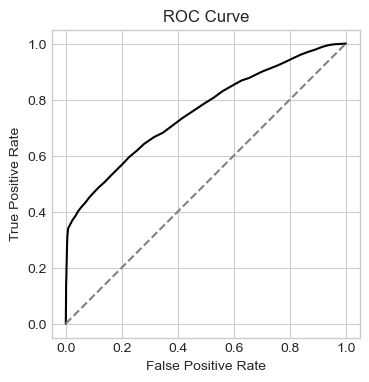

In [27]:
from matplotlib import pyplot as plt
import tqdm
np.set_printoptions(precision = 3)
plt.style.use('seaborn-v0_8-whitegrid')

fig, ax = plt.subplots(1, 1, figsize = (6, 4))

num_thresholds = 101

FPR = np.zeros(num_thresholds)
TPR = np.zeros(num_thresholds)
T = np.linspace(s.min()-0.1, s.max()+0.1, num_thresholds)
s    = linear_score(X_train[bestLRCols], weights).to_numpy().reshape(-1)

for i in tqdm.trange(num_thresholds):
    t = T[i]
    preds    = s >= t
    FPR[i]   = ((preds== 1) * (y_train == 0)).sum() / (y_train == 0).sum()
    TPR[i]   = ((preds== 1) * (y_train == 1)).sum() / (y_train == 1).sum()


ax.plot(FPR, TPR, color = "black")
ax.plot([0,1], [0,1], linestyle="--", color = "grey")
ax.set_aspect('equal')

labs = ax.set(xlabel = "False Positive Rate", ylabel = "True Positive Rate", title = "ROC Curve")

The loan cost for each scenario depends on the loan amount and the loan interest rate. The gain if repaid, or the gain of a true negative (negative meaning not defaulting on a loan) can be calculated as loan_amnt*(1 + 0.25*loan_int_rate)** 10 - loan_amnt and the loss cost, or the cost of a false negative (bank giving someone a loan who defaults) can be calculated as loan_amnt*(1 + 0.25*loan_int_rate)**3 - 1.7*loan_amnt.

In [35]:
def create_cost_cols(df):
    df["gain_if_repaid"] = df["loan_amnt"]*(1 + 0.25*(df["loan_int_rate"]/100))**10 - df["loan_amnt"]
    df["cost_if_default"] = df["loan_amnt"]*(1 + 0.25*(df["loan_int_rate"]/100))**3 - 1.7*df["loan_amnt"]
    return df
    

Calculate the profit of the bank by summing the gain of TN (multiplying the number of TN by the gain if repaid) and the lost of FN (multiplying the number of FN by the gain if default).

In [36]:
def calculate_gain(preds, y, df):
    
    gain_of_TN = (((preds == 0) * (y == 0)) * df["gain_if_repaid"]).sum()
    cost_of_FN = (((preds == 0) * (y == 1)) * df["cost_if_default"]).sum()
    
    return gain_of_TN + cost_of_FN

I can calculate the gain per loan in this schema by summing the mean of each gain and loss of the bank

In [37]:
def calculate_gain_per_loan(preds, y, df):
    
    mean_gain_of_TN = (((preds == 0) * (y == 0)) * df["gain_if_repaid"]).mean()
    mean_cost_of_FN = (((preds == 0) * (y == 1))* df["cost_if_default"]).mean()
    
    return mean_gain_of_TN + mean_cost_of_FN

To find the optimal threshold I will plot the gain as a function of the threshold. 

  0%|          | 0/101 [00:00<?, ?it/s]

100%|██████████| 101/101 [00:00<00:00, 2612.11it/s]


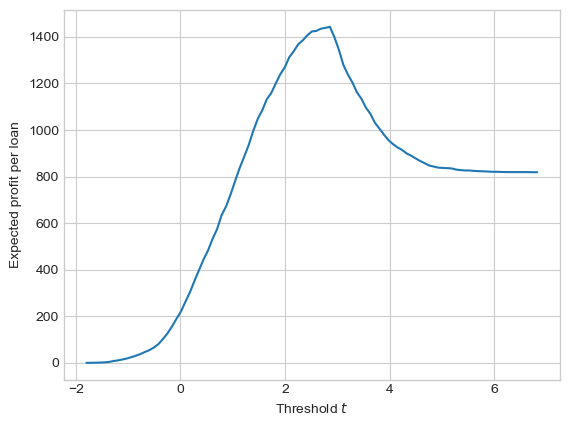

In [40]:
from matplotlib import pyplot as plt
np.set_printoptions(precision = 3)
import tqdm

num_thresholds = 101

gains = np.zeros(num_thresholds)

T = np.linspace(s.min()-0.1, s.max()+0.1, num_thresholds)
s    = linear_score(X_train[bestLRCols], weights).to_numpy().reshape(-1)
X_train["s"] = s

gain_of_TN = 0
cost_of_FN = 0

create_cost_cols(df_train)

for i in tqdm.trange(num_thresholds):
    t = T[i]
    preds    = s >= t

    gains[i] =  calculate_gain_per_loan(preds, y_train, df_train)

plt.plot(T, gains)
labs = plt.gca().set(xlabel = r"Threshold $t$", ylabel = "Expected profit per loan")

Find the optimal threshold by finding the x-coordinate of the maximum gain in our gain/threshold graph.

In [41]:
max_y = np.argmax(gains)
t = T[max_y]
print("Optimal threshold: ", t)

Optimal threshold:  2.857653939857805


Find the banks profit and gain by loan by calculating the gain based on the training data

In [42]:
preds = X_train["s"] >= t

create_cost_cols(df_train)

gain_per_loan = calculate_gain_per_loan(preds, y_train, df_train)
total_gain = calculate_gain(preds, y_train, df_train)

print(f"{gain_per_loan=}")
print(f"{total_gain=}")

gain_per_loan=1443.5504241029244
total_gain=33067409.564925686


# TESTING

First I downloaded and prepared the test data.

In [147]:
url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/credit-risk/test.csv"
df_test = pd.read_csv(url)

df_test, loan_intent_original = prepare_data(df_test)
y_test = df_test["loan_status"].to_numpy()
X_test = df_test.drop(["loan_status"], axis = 1)

Find the banks profit by calculating the gain based on the testing data

In [148]:
s    = linear_score(X_test[bestLRCols], weights).to_numpy().reshape(-1)
X_test["s"] = s

preds = s >= t

create_cost_cols(df_test)

gain = calculate_gain(preds, y_test, df_test)
print(f"{gain=}")

gain=7931919.35735091


Again, I calculate the gain per loan in this schema by summing the mean of each gain and loss of the bank. This value should be similar to the gain per loan o the training data.

In [69]:
calculate_gain_per_loan(preds, y_test, df_test)

1384.0375776218652

Calculate the mean of preds to see what our loaning trend is. Closer to 0 means we are giving loans to most people. Closer to one would mean we were not.

In [46]:
preds.mean()

0.08584889199092655

# Evaluate Model

First I places predicted_loan_status into a column

In [149]:
df_test["predicted_loan_status"] = preds

In [70]:
df_test

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_intent_num,...,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,gain_if_repaid,cost_if_default
0,21,42000,5.0,1000,15.58,1,0.02,0,4,5,...,False,True,False,False,False,False,False,True,465.367227,-578.539601
1,32,51000,2.0,15000,11.36,0,0.29,0,9,0,...,False,False,True,False,False,False,False,False,4847.780062,-9185.361205
2,35,54084,2.0,3000,12.61,0,0.06,0,6,0,...,False,True,True,False,False,False,False,False,1091.841800,-1807.236578
3,28,66300,11.0,12000,14.11,1,0.15,0,6,3,...,False,False,False,False,False,True,False,False,4972.214553,-7084.777554
4,22,70550,0.0,7000,15.88,1,0.08,0,3,3,...,False,True,False,False,False,True,False,False,3331.859215,-4032.764115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6511,29,78000,2.0,18000,6.62,0,0.23,0,5,4,...,False,False,False,False,False,False,True,False,3210.941787,-11691.427669
6513,27,44640,0.0,12800,11.83,0,0.29,0,9,3,...,False,True,False,False,False,True,False,False,4331.281644,-7790.401145
6514,24,48000,5.0,10400,7.37,0,0.22,0,3,5,...,True,False,False,False,False,False,False,True,2083.140437,-6694.483153
6515,26,65000,6.0,6000,9.07,0,0.09,0,3,1,...,False,False,False,True,False,False,False,False,1508.058449,-3782.525248


## Used a graph to answer the question: Is it more difficult for people in certain age groups to access credit under your proposed system?

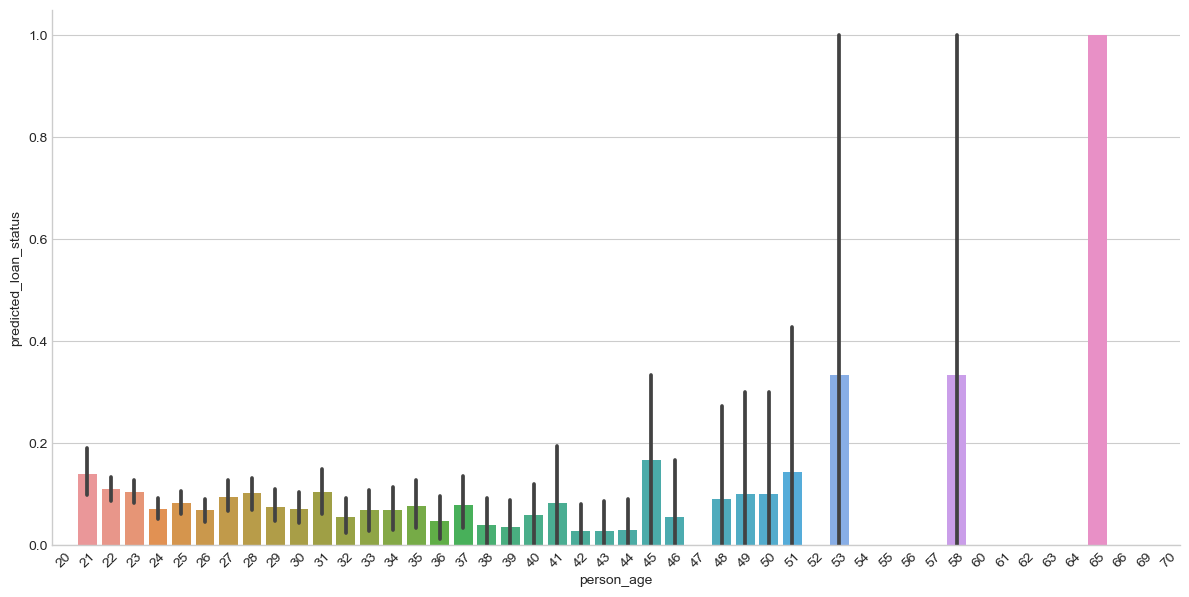

In [62]:
sns.catplot(data=df_test, y="predicted_loan_status", x="person_age", kind="bar", height=6, aspect=2)
plt.xticks(rotation=45)
plt.show()

This graph shows how the predictions are defaulting is significantly higher at older ages. Therefore an older borrower would find it difficult to obtain a loan from this bank using this model.

## Next I attempted to answer the question: Is it more difficult for people to get loans based on their different loan intentions?

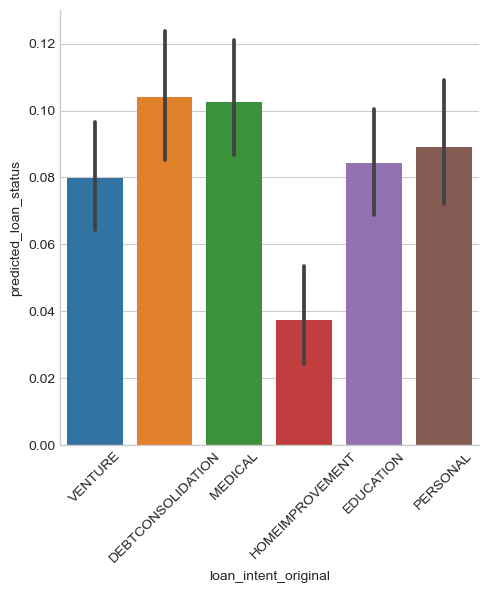

In [153]:
df_test["loan_intent_original"] = loan_intent_original
sns.catplot(data=df_test, y="predicted_loan_status", x="loan_intent_original", kind="bar")
plt.show()

This graph indicates that is easier to receive a loan based on this model is you are using the money for venture than debt consolidation. It shows that it is easiest to receive a loan for home improvement and hardest for debt consolidation and medical reasons. 

In [ ]:
## Utilized a figure to ask: How does a person’s income level impact the ease with which they can access credit under your decision system?

/Users/lindseyschweitzer/anaconda3/envs/ml-0451/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lindseyschweitzer/anaconda3/envs/ml-0451/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


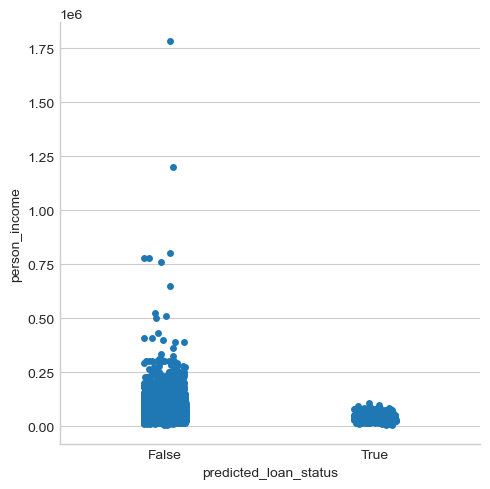

In [187]:
sns.catplot(data=df_test, y="person_income", x="predicted_loan_status")

This catplot represents graphs income as function of predicted loan status. Borrowers with higher incomes are more likely here to be predicted to pay back their loans. Therefore, the borrowers with lower incomes, and probably therefore a higher need for the loans, are less likely to receive it based on this model. 